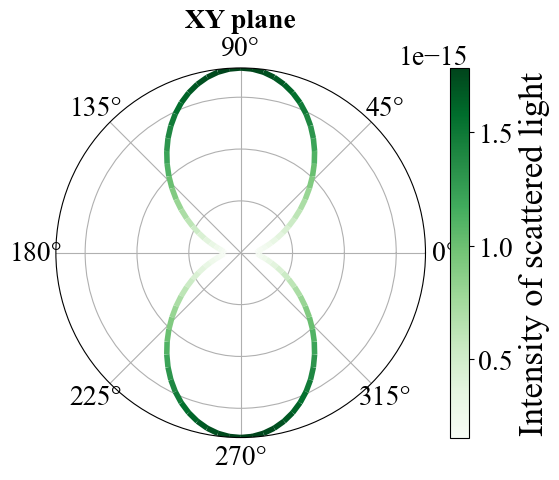

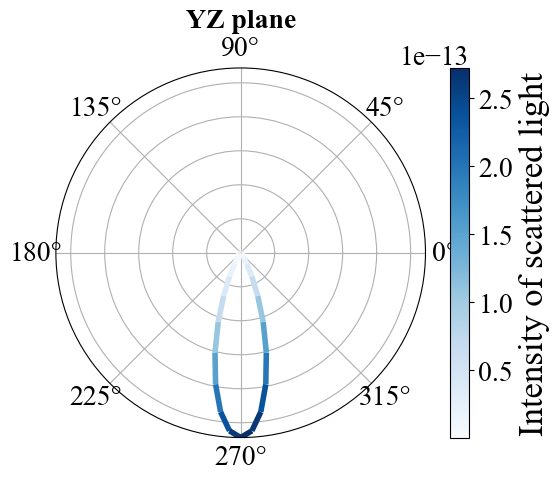

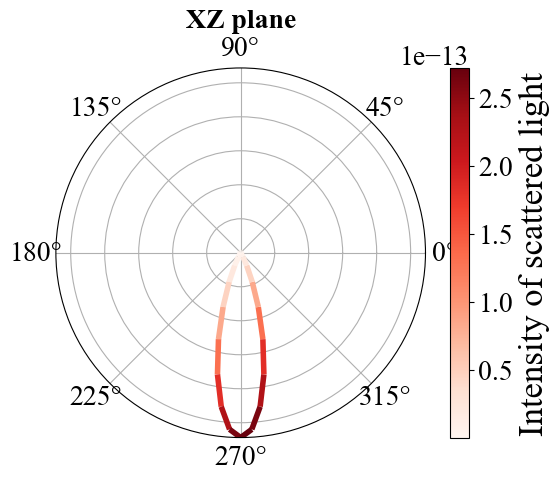

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
from matplotlib.collections import LineCollection
from matplotlib.colors import Normalize

dpi_value = 100

# Load MATLAB data file
data_file = h5py.File('farfield_data_500_nm.mat', 'r')

# Extract data for xy axis
theta_xy = data_file['theta_xy'][:].flatten()
r_xy = data_file['r_xy'][:].flatten()

# Extract data for yz axis
theta_yz = data_file['theta_yz'][:].flatten()
r_yz = data_file['r_yz'][:].flatten()

# Extract data for xz axis
theta_xz = data_file['theta_xz'][:].flatten()
r_xz = data_file['r_xz'][:].flatten()

# Close the data file
data_file.close()

plt.rcParams['font.family'] = 'Times New Roman'

# Function to create continuous color-mapped line plot
def plot_colored_line(ax, theta, r, cmap_name='viridis'):
    # Create line segments for color-mapping
    points = np.array([theta, r]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    # Normalize radial values for color mapping
    norm = Normalize(vmin=np.min(r), vmax=np.max(r))
    
    # Create a continuous line with color
    lc = LineCollection(segments, cmap=cmap_name, norm=norm)
    lc.set_array(r)  # Set color based on radial values
    lc.set_linewidth(4)  # Set line width

    # Add the collection to the plot
    ax.add_collection(lc)
    ax.set_ylim([0, np.max(r)])  # Set the radial limit based on data
    cbar = plt.colorbar(lc, ax=ax)  # Create the colorbar
    cbar.set_label('Intensity of scattered light', fontweight='normal', fontsize=25)  # Set the label with fontweight

# Font size and weight configuration
title_fontsize = 20
tick_fontsize = 20
fontweight = 'normal'

# Set global font properties
plt.rc('font', size=tick_fontsize, weight=fontweight)  # Set default font size and weight

# Plot for xy axis with continuous color-mapped line and hidden radial values
plt.figure(dpi=dpi_value)
ax1 = plt.subplot(111, projection='polar')
plot_colored_line(ax1, theta_xy, r_xy, cmap_name='Greens')
ax1.set_title("XY plane", fontsize=title_fontsize, fontweight="bold")
ax1.set_yticklabels([])  # Hide the radial ticks
ax1.grid(True)
plt.show()

# Plot for yz axis with continuous color-mapped line and hidden radial values
plt.figure(dpi=dpi_value)
ax2 = plt.subplot(111, projection='polar')
plot_colored_line(ax2, theta_yz, r_yz, cmap_name='Blues')
ax2.set_title("YZ plane", fontsize=title_fontsize, fontweight="bold")
ax2.set_yticklabels([])  # Hide the radial ticks
ax2.grid(True)
plt.show()

# Plot for xz axis with continuous color-mapped line and hidden radial values
plt.figure(dpi=dpi_value)
ax3 = plt.subplot(111, projection='polar')
plot_colored_line(ax3, theta_xz, r_xz, cmap_name='Reds')
ax3.set_title("XZ plane", fontsize=title_fontsize, fontweight="bold")
ax3.set_yticklabels([])  # Hide the radial ticks
ax3.grid(True)
plt.show()
